In [ ]:
## Load Data from CSVs

In [2]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)


In [3]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

# print enrollments[0]
# print daily_engagement[0]
# print project_submissions[0]

## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]['acct']

u'0'

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Investigating the Data

In [7]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

# List version
#     unique_student_num = []
#     for i in range(num_rows):
#         if data[i]['account_key'] not in unique_student_num:
#             unique_student_num.append(data[i]['account_key'])
#     return unique_student_num

def num_unique_students(data):
    unique_students_num = set()
    for i in data:
        unique_students_num.add(i['account_key'])
    return unique_students_num


enrollment_num_rows = len(enrollments)
enrollment_student = num_unique_students(enrollments)
enrollment_num_unique_students = len(enrollment_student)

submission_num_rows = len(project_submissions)
submission_student = num_unique_students(project_submissions)
submission_num_unique_students = len(submission_student)

engagement_num_rows = len(daily_engagement)
engagement_student = num_unique_students(daily_engagement)
engagement_num_unique_students = len(engagement_student)

# The answer method, using set structure


KeyError: 'account_key'

In [ ]:
print('Engagement Student Number: ', engagement_num_unique_students)
print('Submission Student Number: ', submission_num_unique_students)
print('Enrollment Student Number: ', enrollment_num_unique_students)


## Problems in the Data

In [8]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for i in range(len(daily_engagement)):
    daily_engagement[i]['account_key'] = daily_engagement[i]['acct']
    del daily_engagement[i]['acct']
print daily_engagement[0]

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
# Find strange records has without corresponding engagement
# data
#Teacher's code
# for enrollment in enrollments:
#     students = enrollment['account_key']
#     if student not in engagement_student:
#         print enrollment
#         break


strange_student = enrollment_student - engagement_student
strange_enroll_record = []
for enroll_record in enrollments:
    if enroll_record['account_key'] in strange_student:
        strange_enroll_record.append(enroll_record)
print len(strange_student)
for dis_recor in strange_enroll_record[0:5]:
    print dis_recor

NameError: name 'engagement_student' is not defined

## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

num_zero_daycancel = 0
remain_strange = []
for record in strange_enroll_record:
    if record['days_to_cancel'] == 0:
        num_zero_daycancel+=1.0
    else:
        remain_strange.append(record)

print 'Zero days to cancel percentage: ', num_zero_daycancel/len(strange_enroll_record)
print len(remain_strange)

for strange in remain_strange:
    print strange

NameError: name 'strange_enroll_record' is not defined

## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in non_udacity_enrollments[:]:
    if enrollment['days_to_cancel'] > 7 or not enrollment['is_canceled']:
        account_key = enrollment['account_key']
        enroll_date = enrollment['join_date']
        
        if account_key not in paid_students or \
                enroll_date > paid_students[account_key]:
            paid_students[account_key] = enroll_date

print len(paid_students)

995


## Getting Data from First Week

In [15]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [16]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
def remove_free_trial_canceled(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_canceled(non_udacity_enrollments)
paid_engagement = remove_free_trial_canceled(non_udacity_engagement)
paid_submission = remove_free_trial_canceled(non_udacity_submissions)

print len(paid_enrollments), len(paid_engagement), len(paid_submission)
paid_engagement_in_first_week = []

for engagement in paid_engagement:
        account_key = engagement['account_key']
        join_date = paid_students[account_key]
        engage_date = engagement['utc_date']
        if within_one_week(join_date, engage_date):
            paid_engagement_in_first_week.append(engagement)

print(len(paid_engagement_in_first_week))

1293 134549 3618
6919


## Exploring Student Engagement

In [17]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                  'account_key')

In [18]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def total_of_attribute(grouped_data, filed_name):
    total_by_account = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[filed_name]
        total_by_account[key] = total
    return total_by_account

total_minutes_by_account = total_of_attribute(engagement_by_account,'total_minutes_visited')

In [19]:
import numpy as np

# Summarize the data about minutes spent in the classroom
def calculate_statistic(data):    
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

total_minutes = total_minutes_by_account.values()
calculate_statistic(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [20]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
total_minutes_a_week = 7*24*60;

problem_account = []
for account_key in total_minutes_by_account:
    if total_minutes_by_account[account_key] > total_minutes_a_week:
        problem_account.append(account_key)

print len(problem_account)
problem_account_record = []
for record in paid_engagement_in_first_week:
    if record['account_key'] in problem_account:
        problem_account_record.append(record)
problem_account_enroll = []
for record in paid_enrollments:
    if record['account_key'] in problem_account:
        problem_account_enroll.append(record)



0


## Lessons Completed in First Week

In [21]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
total_completed_lessons_by_account = total_of_attribute(engagement_by_account,'lessons_completed')
total_completed_lessons = total_completed_lessons_by_account.values()
# for i in total_completed_lessons_by_account:
#     print total_completed_lessons_by_account[i]
# print total_completed_lessons

In [22]:
calculate_statistic(total_completed_lessons)

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [23]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
for record in paid_engagement_in_first_week:
    if record['num_courses_visited'] > 0:
        record['is_visited'] = 1
    else:
        record['is_visited'] = 0


In [24]:
engagement_by_account = group_data(paid_engagement_in_first_week,
                                  'account_key')
total_days_visited_by_count = total_of_attribute(engagement_by_account,'is_visited')
# print total_days_visited_by_count
print len(total_days_visited_by_count)
calculate_statistic(total_days_visited_by_count.values())

995
Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [25]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
passing_engagement = []
non_passing_engagement = []

pass_student = set()
non_pass_student = set()
for submission in paid_submission:
    if submission['lesson_key'] in subway_project_lesson_keys:
        rating = submission['assigned_rating']
        account_key = submission['account_key']
        if rating == 'PASSED' or rating == 'DISTINCTION':
            pass_student.add(account_key)
        elif rating == 'INCOMPLETE' or rating == 'UNGRADED':
            non_pass_student.add(account_key)

for engagement in paid_engagement_in_first_week:
    account_key = engagement['account_key']
    if account_key in pass_student:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
            
# paid_submission[0]
print len(pass_student),len(non_passing_engagement)
print len(passing_engagement), len(non_passing_engagement)

647 2392
4527 2392


## Comparing the Two Student Groups

In [26]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
pass_engagement_by_account = group_data(passing_engagement,'account_key')
non_pass_engagement_by_account = group_data(non_passing_engagement,'account_key')

def compare_pass_non_pass(pass_engagement_by_account,non_pass_engagement_by_account,fieldname):
    print "%s data of passing group:"%fieldname
    total_pass = total_of_attribute(pass_engagement_by_account, fieldname)
    calculate_statistic(total_pass.values())
    print "%s data of non-passing group:"%fieldname
    total_non_pass = total_of_attribute(non_pass_engagement_by_account, fieldname)
    calculate_statistic(total_non_pass.values())


In [243]:
compare_pass_non_pass(pass_engagement_by_account,
                      non_pass_engagement_by_account,
                      'total_minutes_visited')
print '\n'
compare_pass_non_pass(pass_engagement_by_account,
                      non_pass_engagement_by_account,
                      'num_courses_visited')
print '\n'
compare_pass_non_pass(pass_engagement_by_account,
                      non_pass_engagement_by_account,
                      'lessons_completed')
print '\n'
compare_pass_non_pass(pass_engagement_by_account,
                      non_pass_engagement_by_account,
                      'projects_completed')
print '\n'
compare_pass_non_pass(pass_engagement_by_account,
                      non_pass_engagement_by_account,
                      'is_visited')

total_minutes_visited data of passing group:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
total_minutes_visited data of non-passing group:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


num_courses_visited data of passing group:
Mean: 4.72642967543
Standard deviation: 3.7002397793
Minimum: 0
Maximum: 25
num_courses_visited data of non-passing group:
Mean: 2.58908045977
Standard deviation: 2.90670969025
Minimum: 0
Maximum: 18


lessons_completed data of passing group:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
lessons_completed data of non-passing group:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


projects_completed data of passing group:
Mean: 0.00927357032457
Standard deviation: 0.110809572358
Minimum: 0
Maximum: 2
projects_completed data of non-passing group:
Mean: 0.0
Standard deviation: 0.0
Minimum: 0
Maximum: 0


is_visited 

In [27]:
print "Pass:"
total_pass = total_of_attribute(pass_engagement_by_account, 'total_minutes_visited')
norm = total_pass.values() / np.linalg.norm(total_pass.values())
total_pass = total_of_attribute(pass_engagement_by_account, 'num_courses_visited')
norm += total_pass.values() / np.linalg.norm(total_pass.values())
total_pass = total_of_attribute(pass_engagement_by_account, 'lessons_completed')
norm += total_pass.values() / np.linalg.norm(total_pass.values())
calculate_statistic(norm)
print "Non_pass:"
total_pass = total_of_attribute(non_pass_engagement_by_account, 'total_minutes_visited')
norm = total_pass.values() / np.linalg.norm(total_pass.values())
total_pass = total_of_attribute(non_pass_engagement_by_account, 'num_courses_visited')
norm += total_pass.values() / np.linalg.norm(total_pass.values())
total_pass = total_of_attribute(non_pass_engagement_by_account, 'lessons_completed')
norm += total_pass.values() / np.linalg.norm(total_pass.values())
calculate_statistic(norm)

Pass:
Mean: 0.0784244338944
Standard deviation: 0.0785316037523
Minimum: 0.0
Maximum: 0.573405385609
Non_pass:
Mean: 0.0779952348584
Standard deviation: 0.12533484732
Minimum: 0.0
Maximum: 0.90105367


## Making Histograms

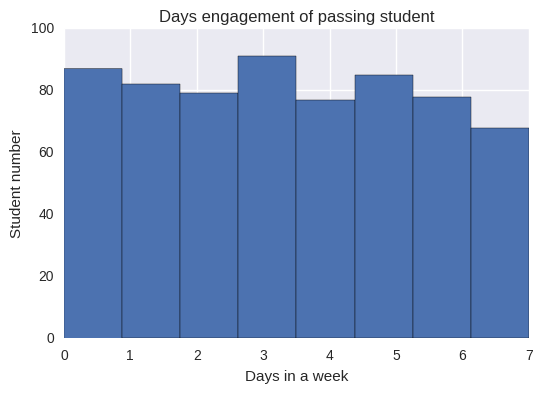

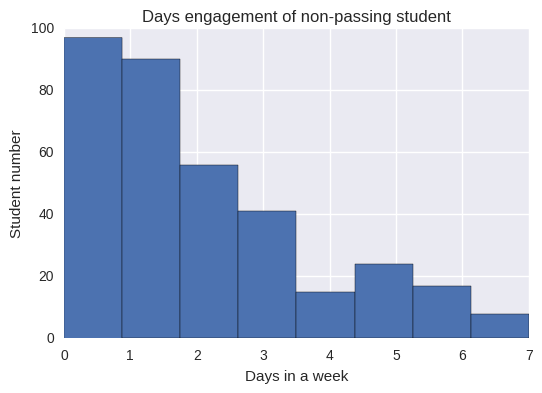

In [28]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
def hist_pass_non_pass(pass_engagement_by_account,
                       non_pass_engagement_by_account,
                       fieldname, bin_num,
                       x_label, y_label, title):
    total_pass = total_of_attribute(pass_engagement_by_account, fieldname)
    fig, axes = plt.subplots()
    plt.hist(total_pass.values(),bins=bin_num)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title+'passing student')
    total_non_pass = total_of_attribute(non_pass_engagement_by_account, fieldname)
    fig, axes = plt.subplots()
    plt.hist(total_non_pass.values(), bins=bin_num)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title+'non-passing student')

    
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# hist_pass_non_pass(pass_engagement_by_account,
#                       non_pass_engagement_by_account,
#                       'total_minutes_visited')
hist_pass_non_pass(pass_engagement_by_account,
                    non_pass_engagement_by_account,
                    'is_visited',8,
                    'Days in a week',
                    'Student number',
                    'Days engagement of ')


## Improving Plots and Sharing Findings

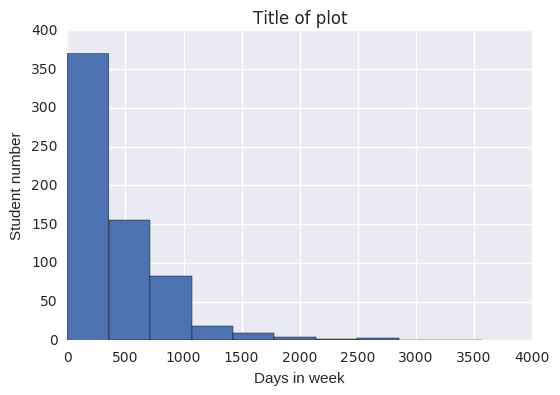

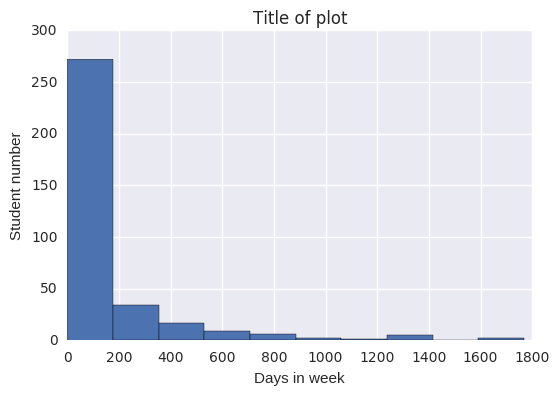

In [261]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
hist_pass_non_pass(pass_engagement_by_account,
                      non_pass_engagement_by_account,
                      'total_minutes_visited',10)